# Decision Trees
### Step 1: Load data, shuffle, partition into train/test

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# FIRST CODE SNIPPET STARTS HERE
# Read csv into panda dataframe
data = pd.read_csv( "./CTG.csv", skiprows=1 )

# Select relevant columns, drop garbage
selected_cols = ["LB", "AC", "FM", "UC", "DL", "DS", "DP", "ASTV", "MSTV",
        "ALTV", "MLTV", "Min", "Max", "Nmax", "Nzeros", "Mode", "Mean",
        "Median", "Variance", "Tendency", "NSP" ]

data = data[selected_cols].dropna()

# shuffle the dataset
data_shuffled = data.sample( frac=1.0, random_state=0 )

# Split into input X and output Y = 'NSP'
X = data_shuffled.drop( "NSP", axis=1 )


# Map diagnosis code to human-readable format
def to_label(y):
    return [None, "normal", "suspect", "pathologic"][int(y)]

Y = data_shuffled["NSP"].apply( to_label )

# Partition into training and test sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split( X, Y,
        test_size=0.2, random_state=0 )

Xtrain.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
1690,137.0,13.0,0.0,3.0,4.0,0.0,0.0,56.0,2.1,0.0,0.2,52.0,188.0,3.0,0.0,160.0,144.0,161.0,39.0,1.0
12,131.0,4.0,57.0,6.0,2.0,0.0,0.0,28.0,1.4,0.0,12.9,88.0,154.0,5.0,0.0,135.0,134.0,137.0,7.0,1.0
950,142.0,4.0,0.0,6.0,0.0,0.0,0.0,34.0,1.1,0.0,19.6,94.0,161.0,5.0,1.0,151.0,146.0,149.0,8.0,1.0
480,140.0,0.0,0.0,1.0,0.0,0.0,0.0,60.0,0.8,32.0,11.2,79.0,199.0,9.0,0.0,141.0,141.0,142.0,3.0,0.0
25,124.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0,0.3,72.0,4.0,118.0,130.0,1.0,0.0,124.0,124.0,125.0,0.0,0.0


### Step 2. Training the baseline classifier
#### Test "dummy classifier"

In [ ]:
# Here we test the dummy clasifier
clf = DummyClassifier( strategy="most_frequent" )
myScores = cross_val_score( clf, Xtrain, Ytrain )

print(myScores)
print( "The dummy classifier scores %0.2f on average with a std. dev. of %0.4f \n"
    % (myScores.mean(), myScores.std() ) )

[0.78235294 0.78235294 0.77941176 0.77941176 0.77941176]
The dummy classifier scores 0.78 on average with a std. dev. of 0.0014 



### Step 3. Trying out some different classifiers

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import accuracy_score

testm_tree = DecisionTreeClassifier()
testm_forest = RandomForestClassifier()
testm_gradient = GradientBoostingClassifier()
testm_percept = Perceptron()

testm_logistic = LogisticRegression(max_iter=100)
testm_SVC = LinearSVC(max_iter=50)


modelnames = ["tree", "forest", "gradient",
         "perceptron", "logistic", "SVC"]
models = [testm_tree, testm_forest, testm_gradient, 
        testm_percept,testm_logistic, testm_SVC ]

print( "\033[91m" + "!!IMPORTANT!! Logistic, SVC do not converge!" +
                " Warnings supressed. !!IMPORTANT!! \033[0m \n")

@ignore_warnings(category=ConvergenceWarning)
def clunkyWarningWorkaround():
    for model,name in zip(models,modelnames):
        myScores = cross_val_score(model, Xtrain, Ytrain, cv=4)
        print( "The %s classifier scores %0.2f on average with a std. dev. of %0.4f \n"
        % (name, myScores.mean(), myScores.std() ) )
    
clunkyWarningWorkaround()

print( "\033[91m" + "!!IMPORTANT!! Logistic, SVC does not converge!" +
         " Warnings supressed. !!IMPORTANT!! \033[0m")


!!IMPORTANT!! Logistic, SVC do not converge! Warnings supressed. !!IMPORTANT!!  

The tree classifier scores 0.92 on average with a std. dev. of 0.0067 

The forest classifier scores 0.94 on average with a std. dev. of 0.0082 

The gradient classifier scores 0.95 on average with a std. dev. of 0.0071 

The perceptron classifier scores 0.79 on average with a std. dev. of 0.0499 

The logistic classifier scores 0.88 on average with a std. dev. of 0.0159 

The SVC classifier scores 0.68 on average with a std. dev. of 0.1684 

!!IMPORTANT!! Logistic, SVC does not converge! Warnings supressed. !!IMPORTANT!! 


When running the models we could see that the LogisticRegression and LinearSVC models get convergence errors and even though we ran it for 10 million iterations. After talking to the Lab assistant we've learned that this probably mean that the data should be normalized before the model trains on it but for this assignement we've only ignored the convergence error messages since normalizing data hasn't been covered in the course yet.

### Task 1 Step 4: Training and testing

In [ ]:
# Gradient classifier had the highest accuracy
Xtrain, Xtest, Ytrain, Ytest = train_test_split( X, Y,
        test_size=0.2, random_state=0)
testm_gradient.fit(Xtrain, Ytrain)
Yguess = testm_gradient.predict(Xtest)
print("Test accuracy score for gradientboostingclassifier: " + str(accuracy_score(Ytest, Yguess)))

Test accuracy score for gradientboostingclassifier: 0.9366197183098591


GradientBoostingClassifier gave the best accuracy for the training data(95%) and while the accuracy is slightly worse than for the training set(93.7%), it is still quite high! Significant improvement from naive classifier at 0.78. (15.7 percentage points). We tried changing max_depth, criterion, learning_rate, n_estimators but the default parameter values seemed to always yield the highest accuracy.


From [sklearns own webpage](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) we can read that *GradientBoostingCLassifier builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.*

A more comperhensive explanation can be found [here](https://towardsdatascience.com/gradient-boosting-classification-explained-through-python-60cc980eeb3d) and from this we can understand that GradientBoostingClassifier is an ensemble learning method that uses gradient boosting to make use of old iterations to boost learning rate for new models.  

# Decision trees for classification

Here we implement a non-sklearn tree using the code provided during the lectures.

In [ ]:
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False

In [ ]:
class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id
        

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass

In [ ]:
from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point


In [ ]:
def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

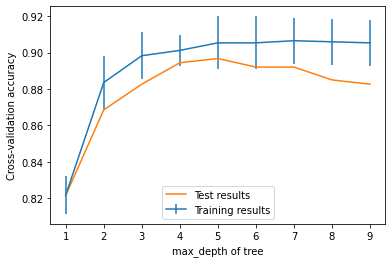

In [ ]:
pts = []
err = []
res = []
depth = np.arange(1,10)
for i in range(1, 10):
    model = TreeClassifier(max_depth=i)
    myScores = cross_val_score(model, Xtrain, Ytrain, cv=4)
    pts.append(myScores.mean())
    err.append(myScores.std())
    model.fit(Xtrain, Ytrain)
    guess = model.predict(Xtest)
    res.append(accuracy_score(Ytest, guess))
    
    #print( "The tree classifier scores %0.9f on average with a std. dev. of %0.4f when using max_depth = %d\n"
    #% ( myScores.mean(), myScores.std(), i ) )

plt.errorbar(depth,pts,err, label = "Training results")
plt.xlabel("max_depth of tree")
plt.ylabel("Cross-validation accuracy")
plt.plot(depth, res, label="Test results")
plt.legend(loc='lower center')
plt.show()

We can see that the model stops improving after max_depth 5 and it is likely that the model is overfitting here or even for lower depths.

Best score: The tree classifier scores 0.905294118 on average with a std. dev. of 0.0145 when using max_depth = 5 on the training data.

In [ ]:
model = TreeClassifier(max_depth=5)
model.fit(Xtrain, Ytrain)

Yguess = model.predict(Xtest)
print(accuracy_score(Ytest, Yguess))

0.8967136150234741


Testing the "homemade" decision tree classifier with depth 5 we get almost the same accuracy on the test set as for the training set. The difference is less than 1 percent. 

For a vizualisation of how a shallow tree might look, see the figure below:

In [ ]:
from graphviz import Digraph
model = TreeClassifier(max_depth=3)
model.fit(Xtrain, Ytrain)hinge function

# force print tree
muhgraph = model.draw_tree()
muhgraph.format = 'png'
muhgraph.render('graph')


'graph.png'

![Graph](graph.png)

# Russian real estate market analysis

In [ ]:
# Read the CSV file using Pandas.
alldata = pd.read_csv("./sberbank.csv")

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

Now we have loaded the data and we are ready to test some numeric regressors

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression

from sklearn.model_selection import cross_validate


# For this kind of numeric regression we want other models
# Note that we OVERWRITE the old models!

testm_tree = DecisionTreeRegressor()
testm_forest = RandomForestRegressor()
testm_gradient = GradientBoostingRegressor()
testm_ridge = Ridge()
testm_Lasso = Lasso()
testm_Linear = LinearRegression()


modelnames = ["tree", "forest", "gradient",
         "ridge", "Lasso", "Linear"]
models = [testm_tree, testm_forest, testm_gradient, 
        testm_ridge,testm_Lasso, testm_Linear ]


for model,name in zip(models,modelnames):
    myScores = cross_validate(model, Xtrain, Ytrain, scoring='neg_mean_squared_error')
    print( "The %s regressor finalizes with a mean squared error of %0.2f \n"
    % (name, abs(myScores["test_score"].mean())))


The tree regressor finalizes with a mean squared error of 0.53 

The forest regressor finalizes with a mean squared error of 0.28 

The gradient regressor finalizes with a mean squared error of 0.26 

The ridge regressor finalizes with a mean squared error of 0.30 

The Lasso regressor finalizes with a mean squared error of 0.30 

The Linear regressor finalizes with a mean squared error of 0.30 



Now we see that the gradient method is again superior, but we also look at the forest regressor, as we have not used it previously.

In [ ]:
from sklearn.metrics import mean_squared_error
# Gradient classifier had the highest accuracy
testm_gradient.fit(Xtrain, Ytrain)
Yguess = testm_gradient.predict(Xtest)
print("Gradient booster mean square error:")
print(mean_squared_error(Ytest, Yguess))

# Check second highest
testm_forest.fit(Xtrain, Ytrain)
Yguess = testm_forest.predict(Xtest)
print("Random forest mean square error:")
print(mean_squared_error(Ytest, Yguess))

Gradient booster mean square error:
0.27136113462267586
Random forest mean square error:
0.2985954094268317


Here we see the gradient booster is also better for the test data. The random forest method comes close however. According to the sklearn documentation the random forest regressor fits a number of decision trees on various subsamples of the training data. The method then uses averaging to improve accuracy. (Many trees = A forest)

## Decision trees for regression
### Step 1. Implementing the regression model

In [ ]:
class TreeRegressor(DecisionTree, RegressorMixin):

    def __init__(self, max_depth=10, var_threshold=0.01):
        super().__init__(max_depth)        
        self.var_threshold = var_threshold
        
    def fit(self, X, Y):       
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        return Y.mean()
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return Y.var() < self.var_threshold                
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])                     
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])
                        
        n = len(Y)                        

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None
        
        sum_y = sum(Y_sorted)
        sum_y_sq = sum(map(lambda x: x**2, Y_sorted))  
        low_distr_sum_y = 0
        low_distr_sum_y_sq = 0        
        high_distr_sum_y = sum_y               
        high_distr_sum_y_sq = sum_y_sq       

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]                                    

            low_distr_sum_y += y_i
            low_distr_sum_y_sq += y_i ** 2
            high_distr_sum_y -= y_i
            high_distr_sum_y_sq -= y_i ** 2            
            n_l = i + 1
            n_h = n - n_l

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue
            
            var_y = variance(sum_y, sum_y_sq, n)
            var_low_y = variance(low_distr_sum_y, low_distr_sum_y_sq, n_l)
            var_high_y = variance(high_distr_sum_y, high_distr_sum_y_sq, n_h)
            
            score = var_y - n_h / n * var_high_y - n_l / n * var_low_y                        

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score                
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point
        
def variance(sum_x, sum_x_sq, n):
    return sum_x_sq / n - 1 / (n**2) * sum_x ** 2  

### Step 2. Sanity check

In [ ]:
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y

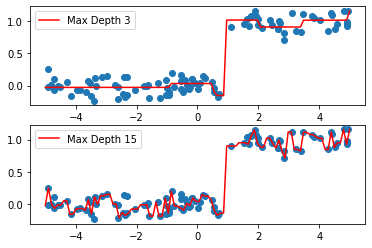

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

tree_regressor1 = TreeRegressor(var_threshold=0.0, max_depth=3)
tree_regressor2 = TreeRegressor(var_threshold=0.0, max_depth=25)
X, Y = make_some_data(100)
tree_regressor1.fit(X, Y)
tree_regressor2.fit(X, Y)

x_tree = np.linspace(-5.0, 5.0, num=len(X))
x_in = np.reshape(x_tree, (len(x_tree),1))
y_tree1 = tree_regressor1.predict(x_in)
y_tree2 = tree_regressor2.predict(x_in)

fig = plt.figure()

ax1 = fig.add_subplot(211)
ax1.scatter(X, Y)
ax1.plot(x_tree, y_tree1, "-r", label="Max Depth 3")
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(212)
ax2.scatter(X, Y)
ax2.plot(x_tree, y_tree2, "-r", label="Max Depth 15")
ax2.legend(loc='upper left')

plt.show()

As we can see, when we set the max depth to 15 the model seems to almost perfectly predict the values in the training set, while setting it to 3 tends to give us a more generalized result. This makes sense, because we restrict the model when it is making decisions for lower depth.

### Step 3. Predicting apartment prices using decision tree regression

In [ ]:
# Read the CSV file using Pandas.
alldata = pd.read_csv("./sberbank.csv")

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

### Now we can compare accuracy for training and test data on the real estate set

In [ ]:
model = TreeRegressor(var_threshold=0.01, max_depth=5)
print("With max depth 5 we get the following results:")
myScores = cross_validate(model, Xtrain, Ytrain)
print( "The homemade regressor finalizes with a score of %0.3f when cross-validating \n"
    % ( abs(myScores["test_score"].mean())))

# Accuracy check on test set:
model.fit(Xtrain, Ytrain)
Yguess = model.predict(Xtest)
print("Homemade regressor test accuracy: \n")
print(mean_squared_error(Ytest, Yguess))



With max depth 5 we get the following results:
The homemade regressor finalizes with a score of 0.273 when cross-validating 

Homemade regressor test accuracy: 

0.2908115453881927


We used a max depth of 5 because it seemed reasonable for performance after step 2.

### Step 4. Underfitting and overfitting

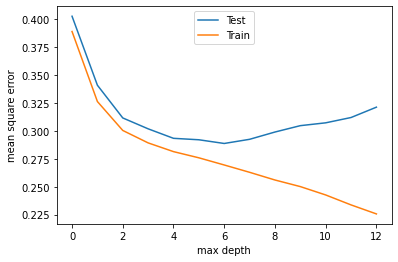

In [ ]:
import matplotlib.pyplot as plt

y_test_sklearn = []
y_train_sklearn = []
y_test = []
y_train = []

for i in range(13):        
    tree_regressor_sklearn = DecisionTreeRegressor(max_depth=i+1)
    tree_regressor = TreeRegressor(var_threshold=0.2, max_depth=i)
    tree_regressor.fit(Xtrain, Ytrain)
    tree_regressor_sklearn.fit(Xtrain, Ytrain)
    
    # add data for TreeRegressor
    Y_test = tree_regressor.predict(Xtest)
    Y_train = tree_regressor.predict(Xtrain)
    
    y_test.append(mean_squared_error(Ytest, Y_test))
    y_train.append(mean_squared_error(Ytrain, Y_train))

    # add data for DecisionTreeRegressor
    Y_test_sklearn = tree_regressor_sklearn.predict(Xtest)
    Y_train_sklearn = tree_regressor_sklearn.predict(Xtrain)
    
    y_test_sklearn.append(mean_squared_error(Ytest, Y_test_sklearn))
    y_train_sklearn.append(mean_squared_error(Ytrain, Y_train_sklearn))

    
x = np.linspace(0, 12, 13)
plt.plot(x, y_test, label="Test")
plt.plot(x, y_train, label="Train")
plt.xlabel('max depth')
plt.ylabel('mean square error')
plt.legend(loc='upper center')
plt.show()

As we can see, the test data have worse performance with increased tree depth while the opposite is true for the training data. This is due to underfitting and overfitting. The tree regressor model seems to overfit - "memorizing" the training data to well with predictions that will very closely match the training data but just that specific training set - for max depths greater than around 5-6. As we can see, the test data immediately have increased loss around a depth around 5-6 because the model is becoming more and more adapted to the training data. It becomes more and more specific and less general. On the other hand, if we have a max depth around 0-2 the model seems to underfit, because we can still get better performance. Therefore it seems like the best depth is around 4-6 where we have a balance of generalization - we do not overfit or underfit.

For comparison with the sklearn DecisionTreeRegressor, see figure below:

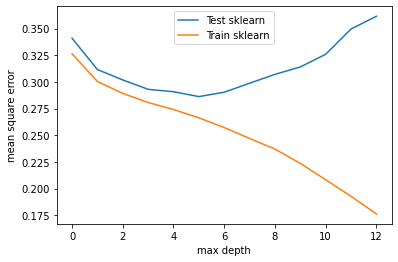

In [ ]:
x = np.linspace(0, 12, 13)
plt.plot(x, y_test_sklearn, label="Test sklearn")
plt.plot(x, y_train_sklearn, label="Train sklearn")
plt.xlabel('max depth')
plt.ylabel('mean square error')
plt.legend(loc='upper center')
plt.show()

By inspecting the figure we see that the sklearn implementation is better than ours but follows the same pattern of overfitting

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4d4cb688-cc05-4422-b541-146650e404eb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>